<a href="https://colab.research.google.com/github/Future-AI-Laboratory/deployment-testing/blob/Review/Test_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
download_link = 'https://data.mendeley.com/public-files/datasets/tywbtsjrjv/files/b4e3a32f-c0bd-4060-81e9-6144231f2520/file_downloaded'

In [2]:
import os

In [3]:

command = 'wget '+ download_link
os.system(command)

0

In [4]:
source = '/content/file_downloaded'

In [5]:
import zipfile

In [6]:
with zipfile.ZipFile(source, 'r') as zip_ref:
        zip_ref.extractall('potato3')

In [1]:
import data_analysis as da

In [2]:
a = da.data_inspection('/content/potato3/Plant_leave_diseases_dataset_with_augmentation', ['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight'], 'Potato3')

In [3]:
a.dataset_content()

Total Disease Classifiers 39

Tomato___healthy
Potato___healthy
Pepper,_bell___Bacterial_spot
Apple___Cedar_apple_rust
Apple___Black_rot
Squash___Powdery_mildew
Grape___healthy
Peach___Bacterial_spot
Apple___healthy
Tomato___Target_Spot
Blueberry___healthy
Potato___Late_blight
Tomato___Bacterial_spot
Corn___healthy
Tomato___Early_blight
Orange___Haunglongbing_(Citrus_greening)
Soybean___healthy
Corn___Northern_Leaf_Blight
Tomato___Tomato_mosaic_virus
Corn___Common_rust
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Grape___Esca_(Black_Measles)
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Late_blight
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Background_without_leaves
Peach___healthy
Strawberry___healthy
Pepper,_bell___healthy
Raspberry___healthy
Grape___Black_rot
Cherry___healthy
Apple___Apple_scab
Corn___Cercospora_leaf_spot Gray_leaf_spot
Tomato___Septoria_leaf_spot
Strawberry___Leaf_scorch
Tomato___Leaf_Mold
Potato___Early_blight
Cherry___Powdery_mildew

The available classifiers 

In [4]:
label_df, img_df, flag = a.fetch_img_info()

Potato3 directory names list ['/content/potato3/Plant_leave_diseases_dataset_with_augmentation/Potato___healthy', '/content/potato3/Plant_leave_diseases_dataset_with_augmentation/Potato___Late_blight', '/content/potato3/Plant_leave_diseases_dataset_with_augmentation/Potato___Early_blight']

[INFO] Loading images ...
[INFO] Processing Potato___healthy
[INFO] Processing Potato___Late_blight
[INFO] Processing Potato___Early_blight


In [5]:
flag

True

In [6]:
label_df

,Potato___healthy,Potato___Late_blight,Potato___Early_blight
0,1000,1000,1000


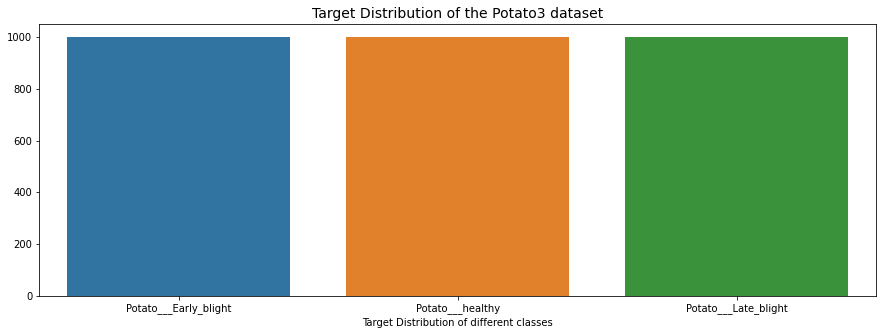

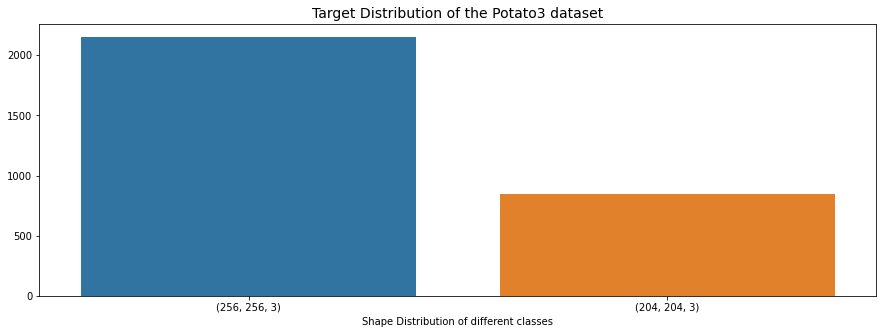

Image shape comparison between different categories 

Shape          Label                
(256, 256, 3)  Potato___Late_blight     1000
               Potato___Early_blight    1000
(204, 204, 3)  Potato___healthy          848
(256, 256, 3)  Potato___healthy          152
dtype: int64

There are imbalances in image shapes!


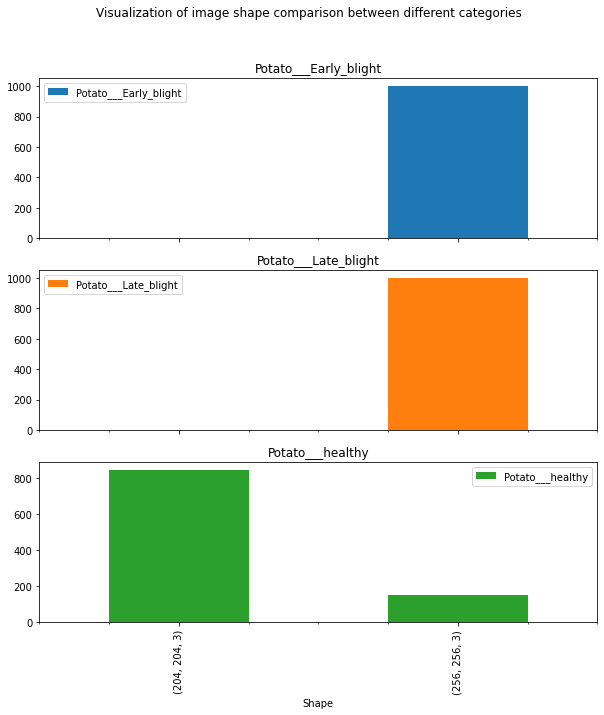

In [7]:
a.distribution_vis()

In [8]:
from keras_preprocessing.image import ImageDataGenerator as IG

In [9]:
import data_preperation as dp

In [10]:
p = dp.data_preperation(img_df, label_df, ['Image', 'Label'], classifiers=['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight'])

In [11]:
train, test = p.stratified_split()

No mismatch is there in the image and label list, check passed!


Label check is done for train and test dataframe, check passed!

Train distribution
Potato___Early_blight    900
Potato___healthy         900
Potato___Late_blight     900
Name: Label, dtype: int64

Test distribution
Potato___Early_blight    100
Potato___healthy         100
Potato___Late_blight     100
Name: Label, dtype: int64

Stratified train-test split check is passed!


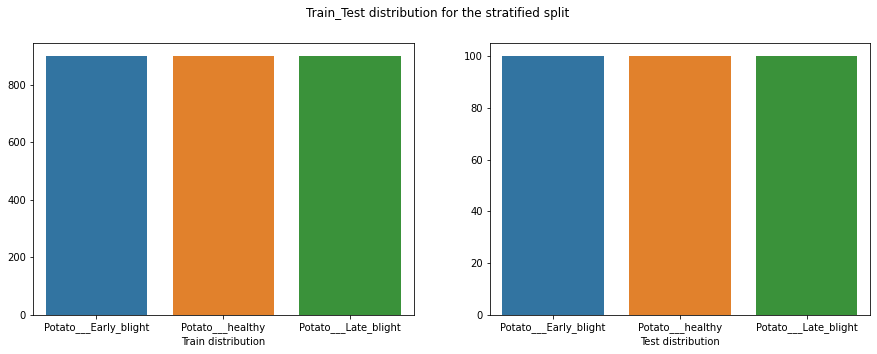

In [12]:
p.train_test_distribution_check()

In [ ]:
train['Label'].value_counts()['Potato___healthy']/test['Label'].value_counts()['Potato___healthy']